# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report




# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [24]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [25]:
# seu código aqui
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


Aqui verifico que não temos dados nulos, que devo alterar o tipo de dados do "Weight" para float ou inteiro, vou decedir a seguir


In [26]:
base.head(10)

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
5,60,1,151,67,2,2,0,0,0,0
6,61,1,157,93,3,1,0,0,1,0
7,62,2,178,95,3,3,0,0,1,1
8,48,1,158,71,1,1,0,0,1,0
9,54,1,164,68,1,1,0,0,0,0


Decido alterar o tipo de dados de "Weight" para float.

In [27]:
base['weight'].unique()

array(['62', '85', '64', '82', '56', '67', '93', '95', '71', '68', '80',
       '60', '78', '112', '75', '52', '83', '69', '90', '45', '65', '59',
       '66', '74', '105', '73', '55', '70', '72', '63', '50', '107', '84',
       '77', '79', '76', '58', '115', '97', '53', '57', '49', '110', '94',
       '92', '87', '103', '88', '99', '100', '61', '48', '54', '51', '47',
       '91', '104', '81', '98', '108', '89', '101', '86', '65,5', '142',
       '96', '44', '41', '169', '116', '200', '64,8', '120', '117', '125',
       '106', '114', '113', '129', '124', '42', '123', '111', '102',
       '109', '46', '139', '150', '138', '131', '43', '83,6', '134',
       '106,5', '121', '40', '141', '119', '126', '177', '165', '122',
       '62,3', '118', '89,5', '132', '155', '130', '159', '84,6', '140',
       '82,3', '30', '67,9', '127', '67,5', '74,3', '149', '180', '128',
       '60,2', '64,5', '58,7', '90,5', '37', '80,8', '166', '161', '92,2',
       '75,6', '136', '82,9', '154', '68,9', '170'

In [28]:
base['weight'] = base['weight'].astype(str).str.replace(',','.').astype(float)
base['weight'].unique()

array([ 62. ,  85. ,  64. ,  82. ,  56. ,  67. ,  93. ,  95. ,  71. ,
        68. ,  80. ,  60. ,  78. , 112. ,  75. ,  52. ,  83. ,  69. ,
        90. ,  45. ,  65. ,  59. ,  66. ,  74. , 105. ,  73. ,  55. ,
        70. ,  72. ,  63. ,  50. , 107. ,  84. ,  77. ,  79. ,  76. ,
        58. , 115. ,  97. ,  53. ,  57. ,  49. , 110. ,  94. ,  92. ,
        87. , 103. ,  88. ,  99. , 100. ,  61. ,  48. ,  54. ,  51. ,
        47. ,  91. , 104. ,  81. ,  98. , 108. ,  89. , 101. ,  86. ,
        65.5, 142. ,  96. ,  44. ,  41. , 169. , 116. , 200. ,  64.8,
       120. , 117. , 125. , 106. , 114. , 113. , 129. , 124. ,  42. ,
       123. , 111. , 102. , 109. ,  46. , 139. , 150. , 138. , 131. ,
        43. ,  83.6, 134. , 106.5, 121. ,  40. , 141. , 119. , 126. ,
       177. , 165. , 122. ,  62.3, 118. ,  89.5, 132. , 155. , 130. ,
       159. ,  84.6, 140. ,  82.3,  30. ,  67.9, 127. ,  67.5,  74.3,
       149. , 180. , 128. ,  60.2,  64.5,  58.7,  90.5,  37. ,  80.8,
       166. , 161. ,

In [29]:
base.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.303710,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


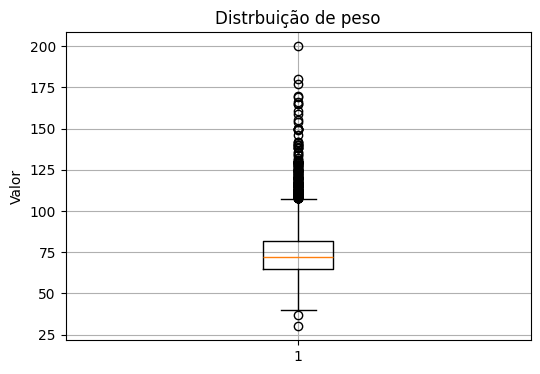

In [30]:
plt.figure(figsize=(6,4))
plt.boxplot(base['weight'])
plt.title('Distrbuição de peso')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


In [31]:
# seu código aqui
colesterol = base.groupby('cholesterol')['cardio_disease'].value_counts(normalize=True).rename('Proporção').reset_index()

import plotly.express as px

fig = px.bar(
    colesterol,
    x = 'cholesterol',
    y= 'Proporção',
    title= 'Relação de doença cardio vascular com colesterol',
    color='cardio_disease',
    labels={
        'cardio_disease': 'Doenças Cardíacas',
        'cholesterol': 'Nível de Colesterol',
        
    }
)

fig.show()

**Insights**: 
Aqui vimos que  colesterol 3, possui uma probilidade maior a ter doença cardíaca.

In [32]:
glicose = base.groupby('gluc')['cardio_disease'].value_counts(normalize=True).rename('Proporção').reset_index()

fig = px.bar(
    glicose,
    x = 'gluc',
    y='Proporção',
    color='cardio_disease',
    title= 'Relaçao de doença cardíaca com glicose',
    labels={
        'gluc':'Glicose',
        'cardio_disease':'Doença Cardíaca',
    }
)
fig.show()

**Insight** - Aqui vimos que a relação é ligeiramente estável 

In [33]:
atividade = base.groupby('active')['cardio_disease'].value_counts(normalize=True).rename('Proporção').reset_index()

fig = px.bar(
    atividade,
    x='active',
    y='Proporção',
    color='cardio_disease',
    title='Relação de doença cardíaca com atividade física ',
    labels={
        'active':'Atividade Física',
    }
)
fig.show()

**Insihts** - Aqui vimos que não possui uma relaçao significativa. 

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



In [34]:
# seu código aqui
correlacao =  base.corr(numeric_only=True)

fig = px.imshow(
    correlacao.values,
    labels=dict(x='Variáveis', y='Variáveis', color="Correlação"),
    x=correlacao.columns,
    y=correlacao.columns,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1
)

# Ajustes de layout
fig.update_layout(
    title='Mapa de Correlação Interativo',
    width=1000,
    height=800,
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10))
)


fig.show()

**Insight** -Nosso alvo é doença cardíaca, sendo assim percebemos 3 principais variaveis que a influenciam, idade, peso, e colesterol. Aprofundando vamos analisar as variaveis que influnciam as principais variveis, e aqui percebemos que: gênero, altura, fumante e álcool, tem correlaçoes razoáveis com a variavél peso, e a glicose, idade são variaveis mais correlacionadas com o colesterol, vale ressaltar que o colesterol tem uma boa correlação com o nosso alvo do projeto, que é a doença cardíaca.

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [35]:
# seu código aqui
from collections import Counter


X= base.drop('cardio_disease', axis=1)
y= base['cardio_disease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print("Shape X_train:", X_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test: ", y_test.shape)

print("Antes do SMOTE:", Counter(y_train))


Shape X_train: (8000, 9)
Shape X_test:  (2000, 9)
Shape y_train: (8000,)
Shape y_test:  (2000,)
Antes do SMOTE: Counter({0: 4020, 1: 3980})


**Insights** - Não preisamos balancear e o shape de base e treino estãp de acordo. 

# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [36]:
# seu código aqui
from sklearn.naive_bayes import GaussianNB


naive_bayes = GaussianNB()

naive_bayes.fit(X_train,y_train)

GaussianNB()

Acurácia de (Treino):  0.609875
Recall (Treino): 0.608975849396235

Relatório de Classificação (Treino):
               precision    recall  f1-score   support

           0       0.58      0.79      0.67      4020
           1       0.67      0.43      0.52      3980

    accuracy                           0.61      8000
   macro avg       0.63      0.61      0.60      8000
weighted avg       0.63      0.61      0.60      8000



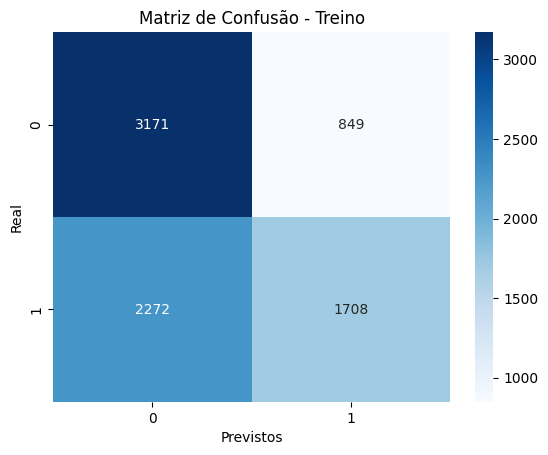

In [37]:

# Rodou o modelo e vamos avaliar a seguir
y_modelo = naive_bayes.predict(X_train) 

# Acurácia treino e teste 
acc = accuracy_score(y_train, y_modelo)
print('Acurácia de (Treino): ', acc)

# Recall (macro → média das classes)
rec = recall_score(y_train, y_modelo, average="macro")
print('Recall (Treino):', rec)

print('\nRelatório de Classificação (Treino):\n', classification_report(y_train, y_modelo))

# Matriz de confusão
cm = confusion_matrix(y_train, y_modelo, labels=naive_bayes.classes_)

plt.Figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.xlabel("Previstos")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Treino")
plt.show()

**Insights** - Aqui percebemos que o modelo tem desempenho ruim, e vimos que ele é melhor pra achar a resposta verdadeira, acertando 67% das previsões.

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

Acurácia de (Treino):  0.6025
Recall (Treino): 0.6114599072186758

Relatório de Classificação (Treino):
               precision    recall  f1-score   support

           0       0.56      0.79      0.65       949
           1       0.69      0.44      0.54      1051

    accuracy                           0.60      2000
   macro avg       0.63      0.61      0.59      2000
weighted avg       0.63      0.60      0.59      2000



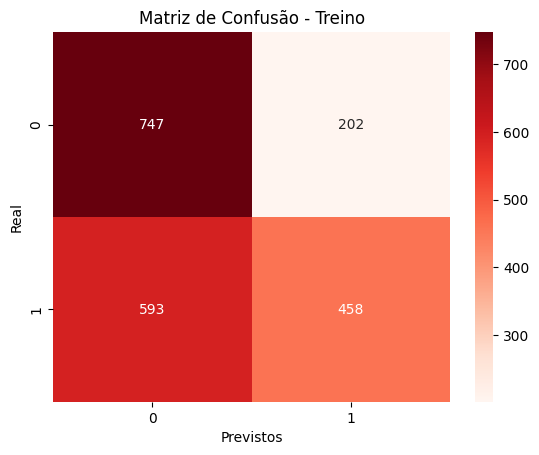

In [38]:
# seu código aqui


# Rodou o modelo e vamos avaliar a seguir
y_modelo = naive_bayes.predict(X_test) 

# Acurácia treino e teste 
acc = accuracy_score(y_test, y_modelo)
print('Acurácia de (Treino): ', acc)

# Recall (macro → média das classes)
rec = recall_score(y_test, y_modelo, average="macro")
print('Recall (Treino):', rec)

print('\nRelatório de Classificação (Treino):\n', classification_report(y_test, y_modelo))

# Matriz de confusão
cm = confusion_matrix(y_test, y_modelo, labels=naive_bayes.classes_)

plt.Figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.xlabel("Previstos")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Treino")
plt.show()

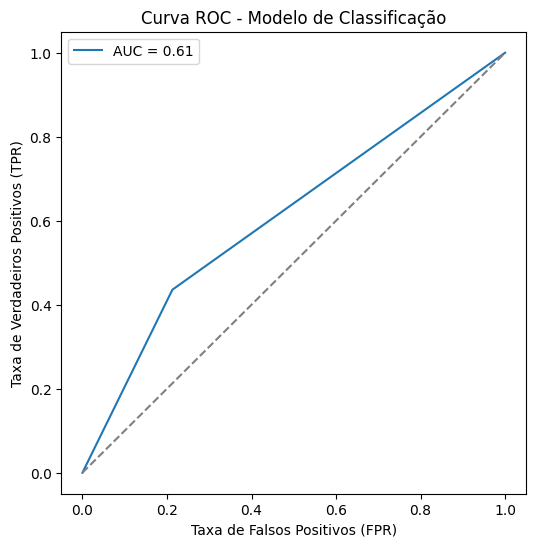

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# calcula as taxas
fpr, tpr, thresholds = roc_curve(y_test, y_modelo)

# calcula a área sob a curva
auc = roc_auc_score(y_test, y_modelo)

# plota a curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linha aleatória
plt.title('Curva ROC - Modelo de Classificação')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()


**Insigths** - pelo gráfico podemos ver que o desempenho do modelo não é bom. ficando apenas um pouco acima da linha tracejada, indicando que acerta um pouco a mais que o acaso.

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



In [40]:
# seu código aqui


**Respostas** 
**A-** Regressão logistica calcula as chances do objeto de estudo ser verdadeiro ou falso. 
**B-**  Pelo fato dele **NÃO** prever um valor especícifo e sim as chances de algo ser verdadeiro ou falso.
**C-** As entradas, treinamento e estrutura são pontos em comum, diferenciado apenas features de otimização e a saída obviamente, pois a linear tem a saida como um valor continuo e a logistica retorna uma chances de algo ser verdadeiro ou falso e assim classificando-os 